<a href="https://colab.research.google.com/github/dienyffer2024/Estatistica/blob/Dados/Estatistica_Pandas_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Amostragem Aleatória Simples
- Criação de um DataFrame com 1000 registros de alunos, incluindo colunas para ID, Idade e Nota. Realizada uma amostragem aleatória simples de 100 alunos e análise da média e mediana das notas da amostra.


In [ ]:
import pandas as pd
import numpy as np

# Criando um conjunto de dados com 1000 alunos
alunos = pd.DataFrame({
    'ID': range(1,1001),
    'Idade': np.random.randint(18, 25, 1000),
    'Nota': np.random.normal(80, 10, 1000)
})

# display(alunos)

# Extraindo uma amostra aleatória de 100 clientes
amostra = alunos.sample(n=100, random_state=1)
# display(amostra)

# Média
media = amostra['Nota'].mean()

# Mediana
mediana = amostra['Nota'].median()

print(f"Média: {media}, Mediana: {mediana}")

# Análise: A média e mediana ficaram em 79, isso indica que os dados das notas estão relativamente bem distribuidos, sem grandes distorções ou outliers. Se considerarmos que a média para aprovação é de 70 pontos, então os alunos estariam aprovados, considerando apenas estes números da amostragem, é claro.

Média: 79.89525555854584, Mediana: 79.26880624165413


2. Boxplot e Identificação de Outliers
- Com uma nova amostra, foi plotado um boxplot para as notas e identificado se existem outliers.

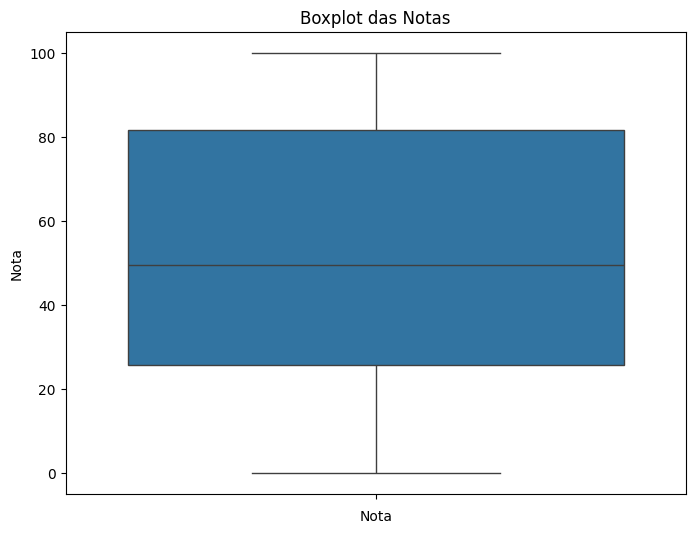

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um DataFrame com 1000 alunos
alunos = pd.DataFrame({
    'ID': range(1, 1001),
    'Idade': np.random.randint(18, 25, 1000),
    'Nota': np.random.randint(0, 101, 1000)  # Notas variando de 0 a 100
})

# Extraindo uma amostra aleatória de 100 alunos
amostra = alunos.sample(n=100, random_state=1)

# Boxplot para análise de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(amostra['Nota'])
plt.title('Boxplot das Notas')
plt.xlabel('Nota')
plt.show()

# Análise: no Boxplot abaixo podemos observar que o Whisker Inferior estende-se até aproximadamente 0, o primeiro quartil (Q1) é aproximadamente 40, a mediana (Q2) é aproximadamente 60, o terceiro quartil (Q3) está em aproximadamente 80 e o Whisker Superior estende-se até aproximadamente 100. As notas parecem estar bem distribuídas entre 0 e 100, havendo uma maior concentração entre 40 e 80. Não existem outliers visíveis no gráfico, isso pode indicar que as notas estão homogêneas e que provavelmente a qualidade do estudo é boa.

3. Histograma para Frequência
- Histograma das idades dos alunos,
e análise da tendência.

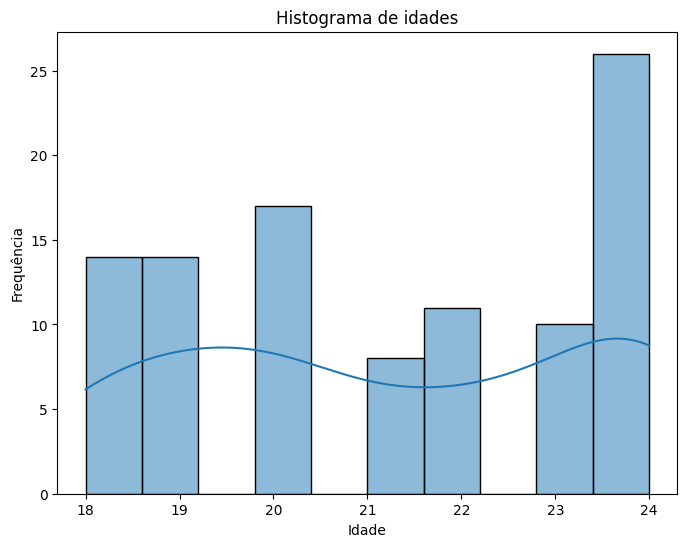

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(amostra['Idade'], bins=10, kde=True)
plt.title('Histograma de idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Análise: A maioria dos alunos possuem idade de 24 anos, mas entre as idades de 18 à 23 anos, está bem distribuido. As idades com menor frequência, como 21 e 23, podem indicar menos alunos nessas faixas etárias específicas. Podemos usar esses dados para planejar recursos e atividades adequadas para a faixa etária predominante.

4. Cálculo de Covariância
- Adicionada uma coluna Horas de Estudo. Calculada a covariância entre Horas de Estudo e Nota.

In [ ]:
import pandas as pd
import numpy as np

# Adicionando a coluna Horas de Estudo
np.random.seed(0)  # Para resultados reprodutíveis
alunos['Horas de Estudo'] = np.random.randint(0, 10, 1000)

# Calculando a covariância
covariancia = alunos[['Horas de Estudo', 'Nota']].cov().iloc[0, 1]
print(f"Covariância entre Horas de Estudo e Nota: {covariancia}")

# Análise: A variância está em 0.87, sendo positiva, pois indica que quando as horas de estudo aumentam, as notas também tendem a aumentar.

Covariância entre Horas de Estudo e Nota: 0.872104104104104


5. Regressão Linear Simples
- Com base nas colunas Horas de Estudo e nota, foi criado um modelo de regressão linear simples. Plotada a linha de regressão junto com os dados.

Coeficiente angular: 0.10843145571598993, Intercepto: 51.54013061079814


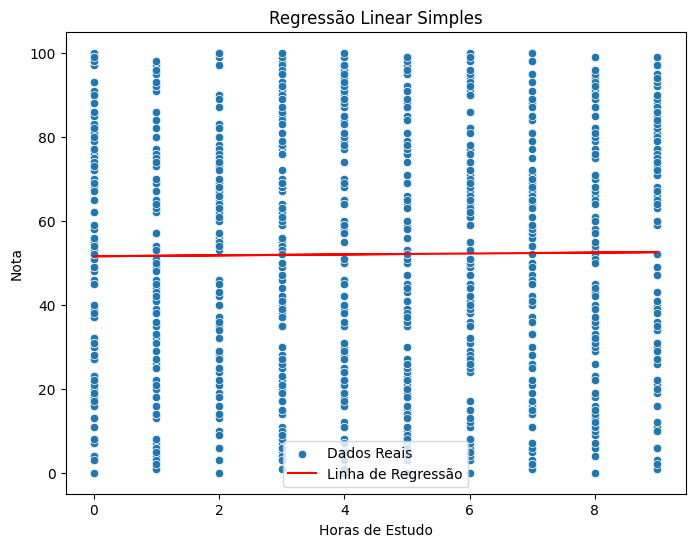

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Definindo variáveis independentes e dependentes
X = alunos[['Horas de Estudo']]  # Variável independente
y = alunos['Nota']    # Variável dependente

# Criando o modelo de regressão
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
print(f"Coeficiente angular: {modelo.coef_[0]}, Intercepto: {modelo.intercept_}")

# Predições
alunos['Nota_Predita'] = modelo.predict(X)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Horas de Estudo', y='Nota', data=alunos, label='Dados Reais')
plt.plot(alunos['Horas de Estudo'], alunos['Nota_Predita'], color='red', label='Linha de Regressão')
plt.title('Regressão Linear Simples')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend()
plt.show()

# Análise: O valor do Coeficiente Angular indica que a cada hora adicional de estudo, a nota do aluno pode aumentar em média 0.108 pontos. Ele representa a relação entre as horas dedicadas ao estudo e as notas. O Intercepto nos diz que, mesmo se o aluno não estudar, a nota inicial esperada é de 51.54.

6. Teste Qui-Quadrado
- Criado um DataFrame com a preferência de cursos entre alunos de diferentes idades. Realizado um teste qui-quadrado para verificar se há associação entre a idade e a preferência de curso.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Criando um DataFrame com a preferência de cursos entre alunos de diferentes idades
np.random.seed(0)
alunos = pd.DataFrame({
    'ID': range(1, 1001),
    'Idade': np.random.randint(18, 25, 1000),
    'Curso': np.random.choice(['Matemática', 'Física', 'Química'], 1000)
})

# Criando uma tabela de contingência
tabela = pd.crosstab(alunos['Idade'], alunos['Curso'])
print("Tabela de Contingência:")
print(tabela)

# Realizando o teste Qui-Quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela)
print(f"Estatística qui-quadrado: {chi2}, p-valor: {p_valor}")

# Análise: O P-valor é de 0.90, é bem maior que o nível de significância, que é de 0.05. Com isso, não podemos rejeitar a hipótese nula. Não podemos concluir que há uma associação entre a idade dos alunos e sua preferÊncia por curso. Esta preferência não parece ser pela idade.

Tabela de Contingência:
Curso  Física  Matemática  Química
Idade                             
18         53          44       46
19         43          52       43
20         53          47       42
21         57          57       47
22         41          47       52
23         55          45       43
24         44          46       43
Estatística qui-quadrado: 6.299969740431713, p-valor: 0.9002119996389656


7. K-Means para Agrupamento
- Geração de um conjunto de dados com características de clientes (por
exemplo, Renda e Gastos). Aplicado o algoritmo K-Means para agrupar os clientes e visualizar os grupos.

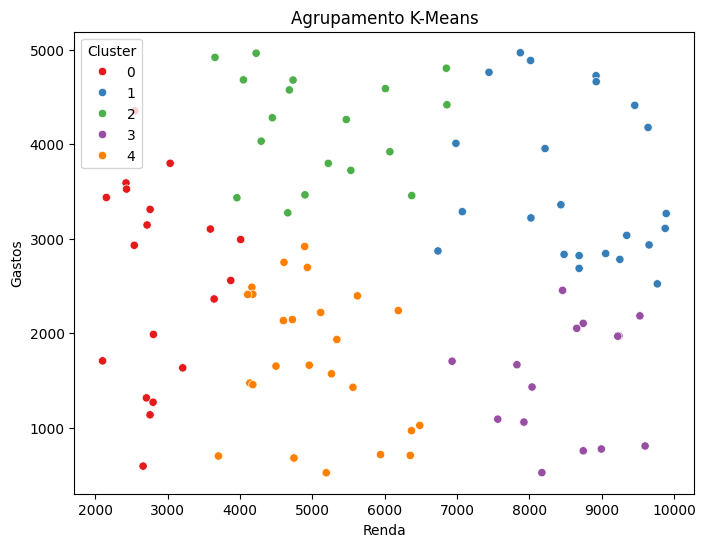

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Gerando o conjunto de dados
np.random.seed(0)
data = pd.DataFrame({
    'Renda': np.random.randint(2000, 10000, 100),
    'Gastos': np.random.randint(500, 5000, 100)
})

# Selecionando as variáveis para agrupamento
X = data[['Renda', 'Gastos']]

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=1)
data['Cluster'] = kmeans.fit_predict(X)

# Gráfico de dispersão com agrupamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Renda', y='Gastos', hue='Cluster', data=data, palette='Set1')
plt.title('Agrupamento K-Means')
plt.xlabel('Renda')
plt.ylabel('Gastos')
plt.legend(title='Cluster')
plt.show()

# Análise: O gráfico mostra que os clientes foram agrupados em cinco clusters (de 0 à 4), cada grupo possui uma distribuição única de renda e gastos, sendo: # Cluster 0 (vermelho): Clientes com renda e gastos baixos. Estes clientes provavelmente têm um perfil mais conservador em termos de gastos.
# Cluster 1 (verde): Clientes com renda e gastos altos. Este grupo tende a ter um poder aquisitivo mais elevado e gastos mais altos, sendo potencialmente um segmento de mercado mais lucrativo.
# Cluster 2 (azul): Clientes com renda média e gastos variáveis. Este grupo pode ter uma diversidade de comportamentos de gastos, possivelmente relacionado a diferentes prioridades financeiras.
# Cluster 3 (laranja): Clientes com renda baixa a média e gastos elevados. Estes podem ser clientes que se estendem além de suas capacidades financeiras, talvez recorrendo a crédito.
# Cluster 4 (roxo): Clientes com renda alta e gastos baixos. Este grupo pode representar indivíduos financeiramente conservadores ou aqueles que preferem poupar.
# Cluster com maior dispersão indicam maior diversidade naquele grupo. Observando essas características é possível criar estratégias de marketing, por exemplo, pessoas do Cluster 1 poderiam ser o público-alvo de produtos premium e serviços mais exclusivos, para o Cluster 4 poderiam ser oferecidos produtos de investimentos. Já o Cluster 3 nos mostra risco, pois talves necessitem de de políticas de crédito mais rigorosas para amenizar os riscos.


8. Análise de Componentes Principais (PCA)
- Conjunto de dados multivariados (Iris).
Aplicado PCA para visualizar os primeiros dois componentes principais.

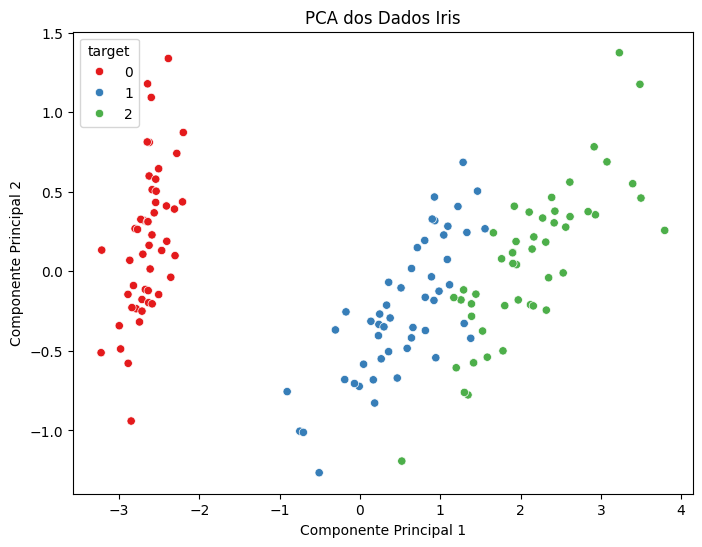

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Carregar o conjunto de dados Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = iris.target

# Visualizar os componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set1')
plt.title('PCA dos Dados Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Análise: No gráfico, os pontos são coloridos de acordo com a classe alvo (target) das amostras de dados: vermelho para a classe 0, azul para a classe 1 e verde para a classe 2. O eixo x representa o "Componente Principal 1" e o eixo y representa o "Componente Principal 2". A classe 0 está bem separada das outras, indicando que os componentes principais capturaram variabilidade significativa que distingue esta classe. as classes 1 e 2 mostram alguma sobreposição, mas há uma separação razoável entre elas. Isso sugere que, embora haja variabilidade comum entre essas classes, o PCA ainda consegue diferenciá-las brevemente.

9. Distribuição Binomial
- Simulada uma situação em que são realizadas 10 tentativas de um experimento com uma probabilidade de sucesso de 0,3. Calculada a distribuição binomial para 0 a 10 sucessos.

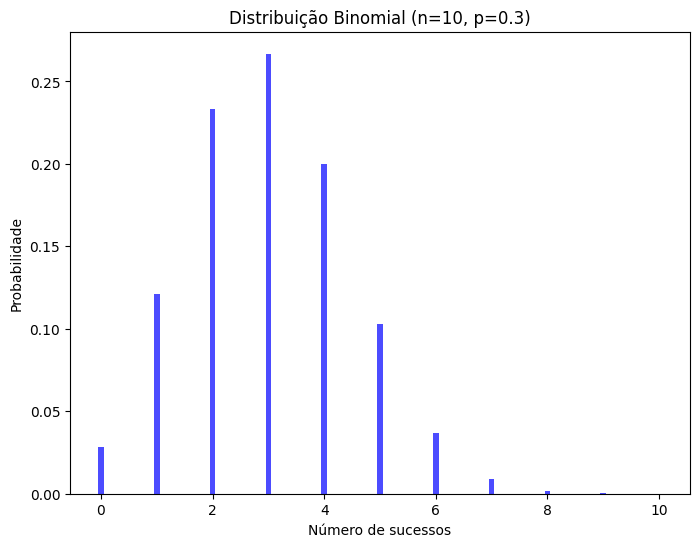

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros para a distribuição binomial
n = 10
p = 0.3

# Gerar valores binomiais
x = np.arange(0, n+1)
binom_pmf = binom.pmf(x, n, p)

# Plotar a distribuição binomial
plt.figure(figsize=(8,6))
plt.bar(x, binom_pmf, width=0.1, color='b', alpha=0.7)
plt.xlabel('Número de sucessos')
plt.ylabel('Probabilidade')
plt.title(f'Distribuição Binomial (n={n}, p={p})')
plt.show()

# Análise: As barras mostram a probabilidade de sucesso em 10 tentativas. Podemos observar que a chance de obter 3 sucesso é maior, seguida pela chance de 2 e 4 sucessos. A distribuição tem uma forma aproximada de um sino, mas é ligeiramente inclinada para a esquerda. A maioria das barras (probabilidades) está concentrada em torno de 2 a 4 sucessos, diminuindo gradualmente conforme nos afastamos desse intervalo. As extremidades do gráfico (0, 1 e 9, 10 sucessos) têm probabilidades muito baixas. Isso significa que é muito improvável obter nenhum sucesso ou todos os sucessos em 10 tentativas.

10. Análise de Séries Temporais
- Série temporal simulada de vendas mensais de um produto ao
longo de dois anos.

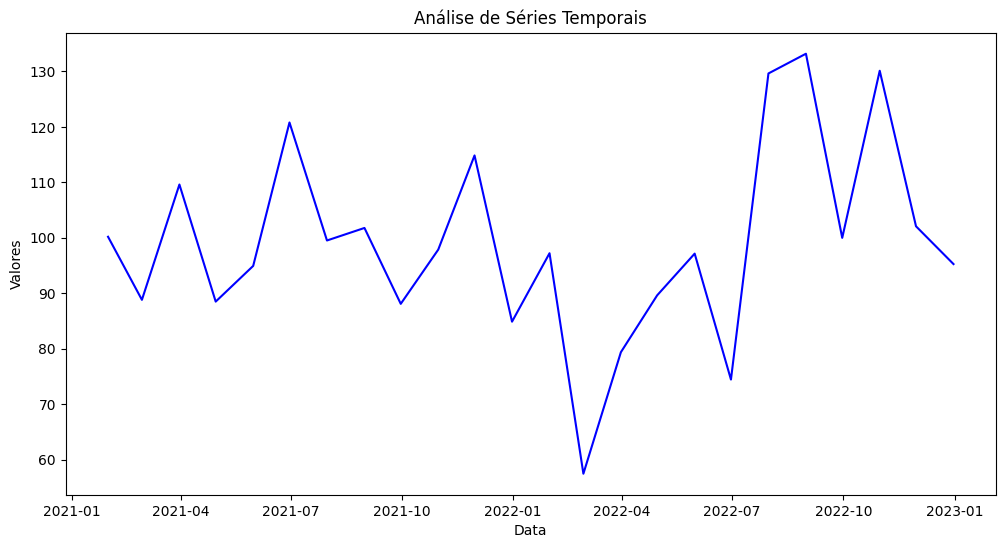

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulando dados de séries temporais
date_range = pd.date_range(start='2021-01-01', periods=24, freq='M')  # 24 períodos mensais
valores = np.random.normal(100, 20, 24)
serie_temporal = pd.DataFrame({'Data': date_range, 'Valores': valores})
serie_temporal.set_index('Data', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Valores'], color='blue')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()

# Análise: Há certos picos nos dados, indicando meses com vendas excepcionalmente altas. Estes podem estar associados a eventos sazonais, promoções ou lançamentos de novos produtos. Ao longo dos dois anos, podemos observar uma tendência geral de crescimento nas vendas. Apesar das flutuações mensais, a linha azul sugere um aumento gradual nos valores de vendas. Com base na tendência de crescimento, pode ser necessário ajustar o planejamento de estoque para atender à demanda crescente.